# YOLO Ball Detection: Training, Validation, and Testing

This notebook guides you through the process of training, validating, and testing a YOLO model for ball detection in soccer/football videos.

USE `T4 GPU` Runtime

## Setup

First, let's install the required packages:

In [5]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

from google.colab import drive
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

Next, we should connect to google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
# put the path to the dataset folder here:
ROOT_DIR = '/content/gdrive/MyDrive/workshop/soccer_ball2'


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
from torchvision import transforms
import torch

# Define a transform to convert the image to a tensor
transform = transforms.ToTensor()

# Load the image
#img = Image.open('./circles_dataset/image_0.png')
img_dataset2 = Image.open('/content/drive/MyDrive/workshop/soccer_ball2/train/images/HE-SCORED-7-GOALS-at-CHAMPIONSHIP-SOCCER-GAME-a-i-_mp4-0000_jpg.rf.b79c24b41e5f78fb30e1aa7276160a29.jpg')

# Apply the transform to the image
#img_tensor = transform(img)
img_tensor2 = transform(img_dataset2)

# Print the tensor
#print(img_tensor)

# Print the shape of the tensor
#print(f"Shape: {img_tensor.shape}")
print(f"Shape_datset2: {img_tensor2.shape}")


Shape_datset2: torch.Size([3, 640, 640])


## 1. Training the Model

We'll start by training the YOLO model using the dataset specified in the YAML file.

In [ ]:
# Load a pre-trained model
 #model = YOLO("yolov8n.pt")
model=YOLO("/content/yolov8n.pt")
#model = YOLO("/content/gdrive/MyDrive/workshops/cv/models/soccer_ball.pt")

yaml_path = os.path.join(ROOT_DIR, '/content/drive/MyDrive/workshop/soccer_ball2/data.yaml')

In [ ]:
results = model.train(
    data=yaml_path,
    epochs=8,
    imgsz=1960,
    batch=10,
    patience=20,
    cache='disk',
    cos_lr=True,
    amp=True,
    device=0
)


Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/drive/MyDrive/workshop/soccer_ball2/data.yaml, epochs=8, time=None, patience=20, batch=10, imgsz=1960, save=True, save_period=-1, cache=disk, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

train: Scanning /content/drive/MyDrive/workshop/soccer_ball2/train/labels.cache... 221 images, 135 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]
train: Caching images (0.3GB Disk): 100%|██████████| 221/221 [00:00<00:00, 3371.17it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/workshop/soccer_ball2/valid/labels.cache... 63 images, 28 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]
val: Caching images (0.1GB Disk): 100%|██████████| 63/63 [00:00<00:00, 1762.38it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1984 train, 1984 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8      14.6G      1.246      30.97      1.232          0       1984: 100%|██████████| 23/23 [00:38<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.52s/it]

                   all         63         35    0.00115      0.543      0.544      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8      13.1G      1.191      23.03      1.153          0       1984: 100%|██████████| 23/23 [00:34<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.42s/it]

                   all         63         35   0.000952      0.514   0.000825   0.000557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8      13.1G       1.19      21.38      1.262          0       1984: 100%|██████████| 23/23 [00:31<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:04<00:12,  4.13s/it]

WARNING ⚠️ NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.71s/it]

                   all         63         35      0.897      0.514      0.557      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8      13.1G        1.2      18.35      1.223          0       1984: 100%|██████████| 23/23 [00:32<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.30s/it]

                   all         63         35      0.943      0.474      0.676      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8      13.1G      1.084      35.53      1.141          0       1984: 100%|██████████| 23/23 [00:34<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.20s/it]

                   all         63         35      0.857      0.743      0.778      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8      13.1G      1.237      16.94      1.287          1       1984: 100%|██████████| 23/23 [00:31<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:03<00:11,  3.97s/it]

WARNING ⚠️ NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.71s/it]

                   all         63         35      0.954      0.592      0.623      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8      13.1G      1.169      14.33       1.27          1       1984: 100%|██████████| 23/23 [00:34<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.02s/it]

                   all         63         35      0.938      0.871      0.917      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8      13.1G      1.018      15.68      1.207          1       1984: 100%|██████████| 23/23 [00:33<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:03<00:11,  3.68s/it]

WARNING ⚠️ NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.59s/it]

                   all         63         35      0.967      0.842      0.888      0.705



8 epochs completed in 0.100 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.7MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.7MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:01<00:05,  1.72s/it]

WARNING ⚠️ NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:05<00:05,  2.94s/it]

WARNING ⚠️ NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:09<00:03,  3.38s/it]

WARNING ⚠️ NMS time limit 2.150s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.05s/it]


                   all         63         35      0.937      0.844      0.888      0.692
Speed: 2.2ms preprocess, 22.2ms inference, 0.0ms loss, 163.0ms postprocess per image
Results saved to runs/detect/train4


In [ ]:
results = model.train(
    data=yaml_path,
    epochs=12,             # More epochs for better learning
    imgsz=640,             # Match input image size
    batch=10,              # Increase batch size if possible
    lr0=0.003,             # Adjust learning rate
    patience=10,           # Early stopping to avoid overfitting
    cache='disk',
    cos_lr=True,
    amp=True,
    device=0
)


Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/drive/MyDrive/workshop/soccer_ball2/data.yaml, epochs=12, time=None, patience=10, batch=10, imgsz=640, save=True, save_period=-1, cache=disk, device=0, workers=8, project=None, name=train42, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

train: Scanning /content/drive/MyDrive/workshop/soccer_ball2/train/labels.cache... 221 images, 135 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]
train: Caching images (0.3GB Disk): 100%|██████████| 221/221 [00:00<00:00, 3484.23it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/workshop/soccer_ball2/valid/labels.cache... 63 images, 28 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]
val: Caching images (0.1GB Disk): 100%|██████████| 63/63 [00:00<00:00, 794.53it/s]


Plotting labels to runs/detect/train42/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.003' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train42
Starting training for 12 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/12      1.56G      1.613      4.899      1.022          0        640: 100%|██████████| 23/23 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all         63         35      0.984      0.857      0.902      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/12      1.57G      1.314      3.497     0.9407          0        640: 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all         63         35      0.874        0.8      0.849      0.612


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/12      1.56G      1.149      5.737     0.9957          0        640: 100%|██████████| 23/23 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all         63         35          1      0.846      0.893      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/12      1.56G      1.287      5.248        1.1          0        640: 100%|██████████| 23/23 [00:04<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all         63         35      0.957        0.8      0.894      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/12      1.56G      1.285      3.487      1.123          0        640: 100%|██████████| 23/23 [00:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all         63         35      0.998        0.8      0.892      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/12      1.56G      1.365      3.576      1.113          0        640: 100%|██████████| 23/23 [00:04<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all         63         35      0.965      0.791       0.86      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/12      1.55G      1.243       3.38      1.074          2        640: 100%|██████████| 23/23 [00:05<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all         63         35      0.908      0.849      0.852      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/12      1.56G      1.166      2.513      1.127          0        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all         63         35       0.96      0.886      0.903      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/12      1.56G      1.041      2.313      1.051          1        640: 100%|██████████| 23/23 [00:05<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all         63         35      0.984      0.886      0.928      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/12      1.56G      1.125      2.712      1.096          0        640: 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all         63         35      0.995      0.886      0.953      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/12      1.56G      1.035      2.286       1.03          0        640: 100%|██████████| 23/23 [00:04<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all         63         35          1      0.904      0.958       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/12      1.56G     0.8985      1.982     0.9805          0        640: 100%|██████████| 23/23 [00:04<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]

                   all         63         35      0.998      0.886      0.959      0.753



12 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train42/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train42/weights/best.pt, 6.2MB

Validating runs/detect/train42/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]


                   all         63         35          1      0.904      0.958      0.774
Speed: 0.3ms preprocess, 5.9ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/train42


In [ ]:
results = model.train(
    data=yaml_path,
    epochs=12,             # More epochs for better learning
    imgsz=640,             # Match input image size
    batch=10,              # Increase batch size if possible
    lr0=0.001,             # Adjust learning rate
    patience=10,           # Early stopping to avoid overfitting
    cache='disk',
    cos_lr=True,
    amp=True,
    device=0
)

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/drive/MyDrive/workshop/soccer_ball2/data.yaml, epochs=12, time=None, patience=10, batch=10, imgsz=640, save=True, save_period=-1, cache=disk, device=0, workers=8, project=None, name=train422, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

train: Scanning /content/drive/MyDrive/workshop/soccer_ball2/train/labels.cache... 221 images, 135 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]
train: Caching images (0.3GB Disk): 100%|██████████| 221/221 [00:00<00:00, 2938.78it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/workshop/soccer_ball2/valid/labels.cache... 63 images, 28 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]
val: Caching images (0.1GB Disk): 100%|██████████| 63/63 [00:00<00:00, 128.83it/s]


Plotting labels to runs/detect/train422/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train422
Starting training for 12 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/12       1.6G      1.021      2.909     0.9819          0        640: 100%|██████████| 23/23 [00:05<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all         63         35      0.961      0.886      0.935      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/12      1.57G      1.015       2.16     0.9887          0        640: 100%|██████████| 23/23 [00:04<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all         63         35      0.979      0.857      0.925      0.692


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/12      1.56G     0.9704      2.893     0.9352          0        640: 100%|██████████| 23/23 [00:10<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all         63         35      0.968      0.866      0.916      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/12      1.56G      1.024      2.592      0.975          0        640: 100%|██████████| 23/23 [00:04<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all         63         35          1      0.793      0.915      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/12      1.56G      1.021      1.757      1.023          0        640: 100%|██████████| 23/23 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all         63         35      0.962      0.857      0.918      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/12      1.56G      1.013      1.866     0.9801          0        640: 100%|██████████| 23/23 [00:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all         63         35          1      0.845      0.917      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/12      1.55G      1.246      1.857      1.124          2        640: 100%|██████████| 23/23 [00:04<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

                   all         63         35      0.964      0.857       0.91      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/12      1.56G      1.027      1.425      1.068          0        640: 100%|██████████| 23/23 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all         63         35      0.995      0.857      0.914      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/12      1.56G      1.023      1.342      1.077          1        640: 100%|██████████| 23/23 [00:04<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]

                   all         63         35          1      0.879      0.942      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/12      1.56G     0.9666      1.444       1.03          0        640: 100%|██████████| 23/23 [00:04<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]

                   all         63         35          1       0.88      0.938      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/12      1.56G     0.9435      1.304      1.009          0        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all         63         35      0.961      0.886      0.946      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/12      1.56G     0.8335      1.187     0.9671          0        640: 100%|██████████| 23/23 [00:04<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all         63         35      0.964      0.886      0.947       0.79



12 epochs completed in 0.030 hours.
Optimizer stripped from runs/detect/train422/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train422/weights/best.pt, 6.2MB

Validating runs/detect/train422/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]


                   all         63         35          1      0.879      0.942      0.792
Speed: 0.4ms preprocess, 4.0ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/train422


In [ ]:
model.save("/content/drive/MyDrive/workshop/ball_detection_model.pt")

Note: Make sure the path to your dataset YAML file is correct. Adjust the `epochs` and `imgsz` parameters as needed.

> Add blockquote



## 2. Validating the Model

After training, let's validate the model's performance on the validation set.

In [ ]:
metrics = model.val()

metrics

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/workshop/soccer_ball2/valid/labels.cache... 63 images, 28 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]
val: Caching images (0.1GB Disk): 100%|██████████| 63/63 [00:00<00:00, 3291.29it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


                   all         63         35          1      0.879      0.942      0.787
Speed: 1.0ms preprocess, 23.4ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/detect/train4222


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e9b6c01b430>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## 3. Saving the Model

Let's save our trained model for future use.

In [ ]:
its done already

NameError: name 'model' is not defined

## 4. Testing the Model on a Single Image

Now, let's test our model on a single image from the validation set. Not using cv2.imshow since it doesn't work well with colab


image 1/1 /content/drive/MyDrive/workshop/soccer_ball2/test/images/HE-SCORED-7-GOALS-at-CHAMPIONSHIP-SOCCER-GAME-a-i-_mp4-0410_jpg.rf.60256ddb39c2a804376b9aac4933c4fd.jpg: 640x640 1 ball, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


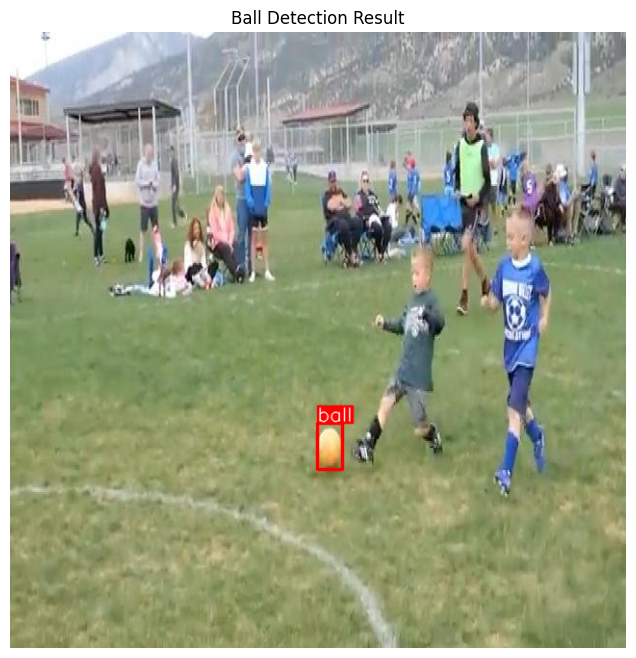

In [21]:
# Load the saved model
model = YOLO("/content/drive/MyDrive/workshop/ball_detection_model.pt")

# Path to test image
test_image_path = os.path.join(ROOT_DIR, '/content/drive/MyDrive/workshop/soccer_ball2/test/images/HE-SCORED-7-GOALS-at-CHAMPIONSHIP-SOCCER-GAME-a-i-_mp4-0410_jpg.rf.60256ddb39c2a804376b9aac4933c4fd.jpg')


# Run inference
results = model(test_image_path)

# Get the first result (assuming single image input)
result = results[0]

# Load the image
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create an annotator object
annotator = Annotator(img)

# Draw bounding boxes on the image
boxes = result.boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)], color=(255, 0, 0))

# Get the annotated image
img_annotated = annotator.result()

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(img_annotated)
plt.axis('off')
plt.title('Ball Detection Result')
plt.show()

## 5. Testing on a Video

If you have a test video, you can use the following code to process it and display the results.

In [23]:
from tqdm import tqdm

def process_video(video_path, output_path, model, conf_threshold=0.2):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    for _ in tqdm(range(total_frames), desc="Processing video"):
        success, frame = cap.read()
        if not success:
            break

        results = model(frame, conf=conf_threshold)
        annotated_frame = results[0].plot()
        out.write(annotated_frame)

    cap.release()
    out.release()
    print(f"Processed video saved to {output_path}")

# Usage
video_path = "/content/drive/MyDrive/workshop/soccer_ball2/GO ARAT! FOOTBALL GAME HIGHLIGHTS.mp4"
output_path = "/content/drive/MyDrive/workshop/output_video1.mp4"
process_video(video_path, output_path, model, conf_threshold=0.2)

Processing video:   0%|          | 0/365 [00:00<?, ?it/s]


0: 384x640 (no detections), 115.6ms
Speed: 1.9ms preprocess, 115.6ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   0%|          | 1/365 [00:00<00:53,  6.85it/s]


0: 384x640 (no detections), 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   1%|▏         | 5/365 [00:00<00:15, 22.61it/s]


0: 384x640 (no detections), 7.1ms
Speed: 1.8ms preprocess, 7.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.8ms
Speed: 1.6ms preprocess, 7.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.7ms
Speed: 1.4ms preprocess, 6.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.7ms
Speed: 1.3ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.0ms
Speed: 1.3ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   3%|▎         | 11/365 [00:00<00:09, 36.53it/s]


0: 384x640 (no detections), 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.8ms
Speed: 1.4ms preprocess, 6.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.0ms
Speed: 1.6ms preprocess, 7.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.6ms
Speed: 2.0ms preprocess, 6.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 8.0ms
Speed: 1.4ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   5%|▍         | 17/365 [00:00<00:08, 42.77it/s]


0: 384x640 1 ball, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 6.7ms
Speed: 1.4ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 6.6ms
Speed: 1.6ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   6%|▌         | 22/365 [00:00<00:07, 44.59it/s]


0: 384x640 1 ball, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.7ms
Speed: 1.3ms preprocess, 6.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   8%|▊         | 28/365 [00:00<00:07, 47.03it/s]


0: 384x640 (no detections), 6.8ms
Speed: 1.4ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.9ms
Speed: 1.3ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 13.4ms
Speed: 1.5ms preprocess, 13.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:   9%|▉         | 33/365 [00:00<00:07, 45.67it/s]


0: 384x640 (no detections), 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 6.8ms
Speed: 1.6ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.9ms
Speed: 2.7ms preprocess, 6.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 2.4ms preprocess, 7.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  11%|█         | 39/365 [00:00<00:06, 47.32it/s]


0: 384x640 1 ball, 6.6ms
Speed: 2.6ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.8ms
Speed: 1.5ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.9ms
Speed: 2.1ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.5ms
Speed: 1.4ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.1ms
Speed: 1.6ms preprocess, 10.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  12%|█▏        | 44/365 [00:01<00:07, 45.54it/s]


0: 384x640 (no detections), 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.9ms
Speed: 2.4ms preprocess, 9.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.7ms
Speed: 3.9ms preprocess, 9.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.8ms
Speed: 2.3ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  13%|█▎        | 49/365 [00:01<00:07, 43.87it/s]


0: 384x640 (no detections), 9.9ms
Speed: 2.2ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.1ms
Speed: 3.7ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  15%|█▍        | 54/365 [00:01<00:07, 43.09it/s]


0: 384x640 1 ball, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.0ms
Speed: 2.3ms preprocess, 9.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  16%|█▌        | 59/365 [00:01<00:07, 41.70it/s]


0: 384x640 (no detections), 10.1ms
Speed: 2.3ms preprocess, 10.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.5ms
Speed: 2.9ms preprocess, 9.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  18%|█▊        | 64/365 [00:01<00:07, 41.07it/s]


0: 384x640 (no detections), 11.2ms
Speed: 1.4ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 13.2ms
Speed: 1.6ms preprocess, 13.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11.6ms
Speed: 1.4ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.2ms
Speed: 1.4ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  19%|█▉        | 69/365 [00:01<00:07, 40.25it/s]


0: 384x640 1 ball, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.6ms
Speed: 1.4ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11.2ms
Speed: 1.2ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  20%|██        | 74/365 [00:01<00:07, 38.88it/s]


0: 384x640 1 ball, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.1ms
Speed: 1.6ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.5ms
Speed: 2.3ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.7ms
Speed: 1.6ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  21%|██▏       | 78/365 [00:01<00:07, 38.98it/s]


0: 384x640 2 balls, 9.6ms
Speed: 1.4ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 11.1ms
Speed: 1.4ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  22%|██▏       | 82/365 [00:02<00:07, 38.95it/s]


0: 384x640 1 ball, 9.3ms
Speed: 1.4ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16.1ms
Speed: 1.4ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  24%|██▎       | 86/365 [00:02<00:07, 38.73it/s]


0: 384x640 (no detections), 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.9ms
Speed: 1.5ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.6ms
Speed: 2.2ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  25%|██▍       | 90/365 [00:02<00:07, 38.91it/s]


0: 384x640 1 ball, 11.6ms
Speed: 1.3ms preprocess, 11.6ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 9.6ms
Speed: 1.5ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.6ms
Speed: 1.3ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.6ms
Speed: 1.4ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  26%|██▌       | 94/365 [00:02<00:07, 38.69it/s]


0: 384x640 1 ball, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.2ms
Speed: 1.4ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 8.8ms
Speed: 2.5ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.3ms
Speed: 2.2ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  27%|██▋       | 99/365 [00:02<00:06, 39.15it/s]


0: 384x640 1 ball, 12.5ms
Speed: 2.2ms preprocess, 12.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 10.0ms
Speed: 2.4ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  28%|██▊       | 103/365 [00:02<00:06, 38.49it/s]


0: 384x640 2 balls, 9.0ms
Speed: 2.9ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 9.4ms
Speed: 2.9ms preprocess, 9.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 15.0ms
Speed: 1.6ms preprocess, 15.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  29%|██▉       | 107/365 [00:02<00:06, 38.07it/s]


0: 384x640 1 ball, 9.6ms
Speed: 1.5ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11.0ms
Speed: 1.4ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.5ms
Speed: 1.4ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.1ms
Speed: 1.6ms preprocess, 10.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  30%|███       | 111/365 [00:02<00:06, 38.37it/s]


0: 384x640 1 ball, 9.7ms
Speed: 2.5ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14.1ms
Speed: 2.6ms preprocess, 14.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  32%|███▏      | 115/365 [00:02<00:06, 37.04it/s]


0: 384x640 3 balls, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.8ms
Speed: 1.5ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  33%|███▎      | 120/365 [00:03<00:06, 40.05it/s]


0: 384x640 1 ball, 13.1ms
Speed: 1.5ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.9ms
Speed: 2.7ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  34%|███▍      | 125/365 [00:03<00:06, 39.30it/s]


0: 384x640 2 balls, 6.9ms
Speed: 1.4ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 8.6ms
Speed: 1.4ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  36%|███▌      | 130/365 [00:03<00:05, 41.52it/s]


0: 384x640 3 balls, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  37%|███▋      | 135/365 [00:03<00:05, 42.97it/s]


0: 384x640 1 ball, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.1ms
Speed: 1.5ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  38%|███▊      | 140/365 [00:03<00:05, 44.86it/s]


0: 384x640 2 balls, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 7.5ms
Speed: 2.0ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 7.0ms
Speed: 1.7ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  40%|███▉      | 145/365 [00:03<00:04, 45.67it/s]


0: 384x640 1 ball, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 7.1ms
Speed: 1.8ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  41%|████      | 150/365 [00:03<00:04, 45.91it/s]


0: 384x640 2 balls, 7.1ms
Speed: 2.2ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 6.8ms
Speed: 2.6ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 6.8ms
Speed: 2.8ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  42%|████▏     | 155/365 [00:03<00:04, 46.16it/s]


0: 384x640 1 ball, 9.7ms
Speed: 1.5ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 9.8ms
Speed: 1.6ms preprocess, 9.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  44%|████▍     | 160/365 [00:03<00:04, 46.16it/s]


0: 384x640 2 balls, 12.7ms
Speed: 1.4ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 7.5ms
Speed: 2.0ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  45%|████▌     | 165/365 [00:03<00:04, 45.43it/s]


0: 384x640 1 ball, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.1ms
Speed: 1.4ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.1ms
Speed: 1.3ms preprocess, 11.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.0ms
Speed: 2.4ms preprocess, 10.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  47%|████▋     | 170/365 [00:04<00:04, 44.04it/s]


0: 384x640 (no detections), 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.5ms
Speed: 1.5ms preprocess, 10.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.9ms
Speed: 1.5ms preprocess, 9.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.5ms
Speed: 1.7ms preprocess, 15.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  48%|████▊     | 175/365 [00:04<00:04, 42.56it/s]


0: 384x640 (no detections), 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.9ms
Speed: 2.1ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.1ms
Speed: 2.7ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  49%|████▉     | 180/365 [00:04<00:04, 42.45it/s]


0: 384x640 (no detections), 9.3ms
Speed: 2.2ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  51%|█████     | 185/365 [00:04<00:04, 42.23it/s]


0: 384x640 1 ball, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 8.7ms
Speed: 3.1ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.1ms
Speed: 1.5ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  52%|█████▏    | 190/365 [00:04<00:04, 41.12it/s]


0: 384x640 1 ball, 11.2ms
Speed: 1.5ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.0ms
Speed: 1.4ms preprocess, 10.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.7ms
Speed: 1.5ms preprocess, 10.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  53%|█████▎    | 195/365 [00:04<00:04, 41.19it/s]


0: 384x640 1 ball, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.4ms
Speed: 2.1ms preprocess, 10.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11.1ms
Speed: 1.5ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.7ms
Speed: 1.5ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  55%|█████▍    | 200/365 [00:04<00:04, 40.14it/s]


0: 384x640 2 balls, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 10.7ms
Speed: 2.3ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 18.4ms
Speed: 1.7ms preprocess, 18.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.1ms
Speed: 1.6ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  56%|█████▌    | 205/365 [00:05<00:04, 37.64it/s]


0: 384x640 1 ball, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.4ms
Speed: 1.5ms preprocess, 10.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.3ms
Speed: 1.6ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  57%|█████▋    | 209/365 [00:05<00:04, 37.74it/s]


0: 384x640 (no detections), 10.0ms
Speed: 1.5ms preprocess, 10.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.2ms
Speed: 2.8ms preprocess, 14.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.5ms
Speed: 1.4ms preprocess, 10.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  58%|█████▊    | 213/365 [00:05<00:04, 37.65it/s]


0: 384x640 (no detections), 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.1ms
Speed: 2.2ms preprocess, 10.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 19.2ms
Speed: 1.5ms preprocess, 19.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  59%|█████▉    | 217/365 [00:05<00:03, 37.06it/s]


0: 384x640 (no detections), 17.9ms
Speed: 1.7ms preprocess, 17.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.5ms
Speed: 1.7ms preprocess, 16.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16.2ms
Speed: 1.7ms preprocess, 16.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 13.1ms
Speed: 1.5ms preprocess, 13.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  61%|██████    | 221/365 [00:05<00:04, 35.31it/s]


0: 384x640 (no detections), 16.7ms
Speed: 1.7ms preprocess, 16.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.1ms
Speed: 1.5ms preprocess, 10.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.7ms
Speed: 3.0ms preprocess, 12.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  62%|██████▏   | 225/365 [00:05<00:03, 35.75it/s]


0: 384x640 (no detections), 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.4ms
Speed: 2.3ms preprocess, 9.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.6ms
Speed: 2.5ms preprocess, 9.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.3ms
Speed: 1.5ms preprocess, 10.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.3ms
Speed: 1.5ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  63%|██████▎   | 230/365 [00:05<00:03, 37.06it/s]


0: 384x640 1 ball, 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.4ms
Speed: 1.5ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14.0ms
Speed: 1.6ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  64%|██████▍   | 234/365 [00:05<00:03, 37.02it/s]


0: 384x640 1 ball, 10.9ms
Speed: 2.4ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 balls, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  65%|██████▌   | 238/365 [00:05<00:03, 37.29it/s]


0: 384x640 1 ball, 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14.7ms
Speed: 1.4ms preprocess, 14.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  66%|██████▋   | 242/365 [00:06<00:03, 37.00it/s]


0: 384x640 1 ball, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.0ms
Speed: 2.3ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  67%|██████▋   | 246/365 [00:06<00:03, 37.53it/s]


0: 384x640 1 ball, 8.6ms
Speed: 2.5ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 8.1ms
Speed: 1.4ms preprocess, 8.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 6.7ms
Speed: 2.1ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  69%|██████▉   | 251/365 [00:06<00:02, 40.24it/s]


0: 384x640 1 ball, 7.2ms
Speed: 2.0ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.0ms
Speed: 1.3ms preprocess, 10.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  70%|███████   | 256/365 [00:06<00:02, 42.53it/s]


0: 384x640 (no detections), 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 2.0ms preprocess, 7.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.3ms
Speed: 2.0ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  72%|███████▏  | 261/365 [00:06<00:02, 44.04it/s]


0: 384x640 1 ball, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 1.6ms preprocess, 7.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  73%|███████▎  | 266/365 [00:06<00:02, 44.78it/s]


0: 384x640 1 ball, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  74%|███████▍  | 271/365 [00:06<00:02, 45.58it/s]


0: 384x640 (no detections), 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.1ms
Speed: 1.6ms preprocess, 8.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  76%|███████▌  | 276/365 [00:06<00:01, 46.46it/s]


0: 384x640 1 ball, 10.0ms
Speed: 1.4ms preprocess, 10.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 8.4ms
Speed: 1.4ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.7ms
Speed: 1.4ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 8.3ms
Speed: 1.4ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  77%|███████▋  | 281/365 [00:06<00:01, 46.42it/s]


0: 384x640 1 ball, 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.3ms
Speed: 1.3ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 17.3ms
Speed: 2.1ms preprocess, 17.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  79%|███████▊  | 287/365 [00:06<00:01, 46.29it/s]


0: 384x640 (no detections), 13.3ms
Speed: 1.5ms preprocess, 13.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 19.2ms
Speed: 1.6ms preprocess, 19.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.9ms
Speed: 1.4ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.3ms
Speed: 1.3ms preprocess, 12.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.7ms
Speed: 1.5ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  80%|████████  | 292/365 [00:07<00:01, 43.56it/s]


0: 384x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.7ms
Speed: 1.5ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.1ms
Speed: 2.2ms preprocess, 12.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.6ms
Speed: 2.5ms preprocess, 11.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.6ms
Speed: 1.5ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  81%|████████▏ | 297/365 [00:07<00:01, 42.14it/s]


0: 384x640 1 ball, 13.0ms
Speed: 1.7ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10.9ms
Speed: 1.4ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.8ms
Speed: 2.2ms preprocess, 9.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  83%|████████▎ | 302/365 [00:07<00:01, 40.74it/s]


0: 384x640 (no detections), 9.7ms
Speed: 1.5ms preprocess, 9.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.0ms
Speed: 1.5ms preprocess, 13.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  84%|████████▍ | 307/365 [00:07<00:01, 39.64it/s]


0: 384x640 (no detections), 10.0ms
Speed: 1.6ms preprocess, 10.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 balls, 11.6ms
Speed: 1.6ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 11.0ms
Speed: 2.5ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 12.6ms
Speed: 1.4ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  85%|████████▌ | 311/365 [00:07<00:01, 38.42it/s]


0: 384x640 1 ball, 10.3ms
Speed: 1.6ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.2ms
Speed: 1.5ms preprocess, 10.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.6ms
Speed: 1.5ms preprocess, 12.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.3ms
Speed: 1.5ms preprocess, 10.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.7ms
Speed: 1.5ms preprocess, 12.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  87%|████████▋ | 316/365 [00:07<00:01, 38.83it/s]


0: 384x640 (no detections), 13.5ms
Speed: 1.5ms preprocess, 13.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.9ms
Speed: 2.3ms preprocess, 15.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  88%|████████▊ | 320/365 [00:07<00:01, 38.59it/s]


0: 384x640 (no detections), 11.9ms
Speed: 3.8ms preprocess, 11.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.3ms
Speed: 1.5ms preprocess, 14.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.8ms
Speed: 2.7ms preprocess, 13.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  89%|████████▉ | 324/365 [00:07<00:01, 38.50it/s]


0: 384x640 (no detections), 10.2ms
Speed: 2.2ms preprocess, 10.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.5ms
Speed: 1.5ms preprocess, 13.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.4ms
Speed: 1.5ms preprocess, 13.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  90%|████████▉ | 328/365 [00:08<00:00, 38.44it/s]


0: 384x640 (no detections), 14.1ms
Speed: 1.6ms preprocess, 14.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.0ms
Speed: 3.6ms preprocess, 10.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.3ms
Speed: 1.5ms preprocess, 10.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  91%|█████████ | 332/365 [00:08<00:00, 38.47it/s]


0: 384x640 (no detections), 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.8ms
Speed: 1.4ms preprocess, 9.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.6ms
Speed: 1.6ms preprocess, 15.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.7ms
Speed: 2.6ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  92%|█████████▏| 337/365 [00:08<00:00, 39.49it/s]


0: 384x640 (no detections), 11.1ms
Speed: 1.5ms preprocess, 11.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.4ms
Speed: 1.5ms preprocess, 10.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  94%|█████████▎| 342/365 [00:08<00:00, 40.23it/s]


0: 384x640 (no detections), 10.7ms
Speed: 1.6ms preprocess, 10.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.8ms
Speed: 1.5ms preprocess, 13.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 18.5ms
Speed: 1.5ms preprocess, 18.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  95%|█████████▌| 347/365 [00:08<00:00, 39.42it/s]


0: 384x640 (no detections), 11.0ms
Speed: 2.4ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 20.2ms
Speed: 2.5ms preprocess, 20.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  96%|█████████▌| 351/365 [00:08<00:00, 38.60it/s]


0: 384x640 (no detections), 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.4ms
Speed: 2.3ms preprocess, 10.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.2ms
Speed: 2.2ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.8ms
Speed: 2.3ms preprocess, 10.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  97%|█████████▋| 355/365 [00:08<00:00, 38.85it/s]


0: 384x640 (no detections), 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.9ms
Speed: 2.4ms preprocess, 10.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.1ms
Speed: 1.6ms preprocess, 12.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing video:  98%|█████████▊| 359/365 [00:08<00:00, 39.10it/s]


0: 384x640 (no detections), 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing video: 100%|█████████▉| 364/365 [00:08<00:00, 40.46it/s]


0: 384x640 (no detections), 13.6ms
Speed: 1.5ms preprocess, 13.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing video: 100%|██████████| 365/365 [00:09<00:00, 40.55it/s]

Processed video saved to /content/drive/MyDrive/workshop/output_video1.mp4


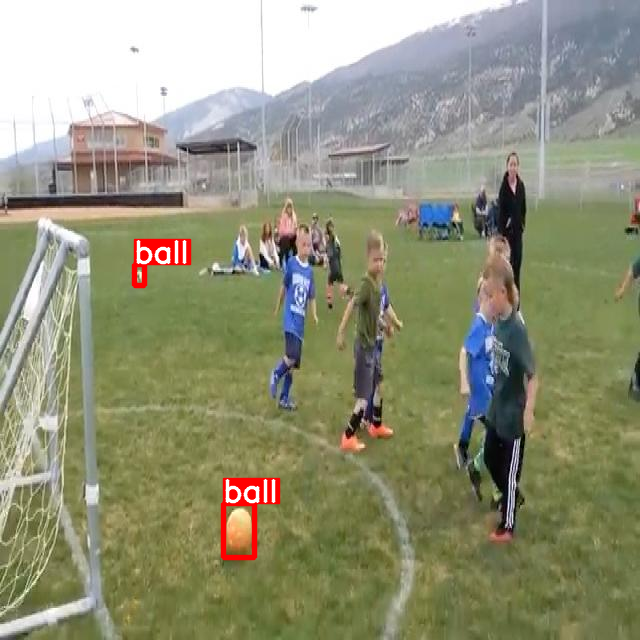

-1

In [ ]:
from google.colab.patches import cv2_imshow

annotator = Annotator(result.orig_img, line_width=3)
boxes = result.boxes
for box in boxes:
    b = box.xyxy[0]
    c = box.cls
    annotator.box_label(b, model.names[int(c)], color=(0, 0, 255))


img = annotator.result()
cv2_imshow(img)
cv2.waitKey(0)

## 6. Model Export (Optional)

If you need to export the model to a different format (e.g., ONNX), you can use the following code:

In [ ]:
path = model.export(format="onnx")
print(f"Model exported to: {path}")

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'gdrive/MyDrive/workshops/cv/models/soccer_ball.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.1 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 76.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 10.4s, saved as 'gdrive/MyDrive/workshops/cv/models/soccer_ball.onnx' (11.7 MB)

Export complete (12.6s)
Results saved to /content/gdrive/MyDrive/workshops/cv/models
Predict:         yolo predict task=detect model=gdrive/MyDrive/workshops/cv/models/soccer_ball.onnx imgsz=640  
Validate:        yolo val task=detect model=gdrive/MyDrive/workshops/cv/models